In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [36]:
df.shape

(47692, 2)

In [37]:
df = df.rename(columns={'tweet_text':'text','cyberbullying_type':'sentiment'})

In [38]:
df.head()

,text,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       47692 non-null  object
 1   sentiment  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [40]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [41]:
df.sentiment.value_counts()

sentiment
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [42]:
df.text.value_counts()

text
RT @sailorhg: the intro for my hardware hacking zine, or, why i am even writing this zine: http://t.co/ruXoAymBz9                                                                                                                                                                           2
I didn't have an outward emotional reaction when my own grandmother died, but I am crying for Nimoy.                                                                                                                                                                                        2
@aussielung Conversely @Shermertron is a good guy and egalitarian.                                                                                                                                                                                                                          2
@KirinDave holy crap. i've got 2 of them so far. just ordered a third. i've been pretty happy so far.                                    

<Axes: xlabel='count', ylabel='sentiment'>

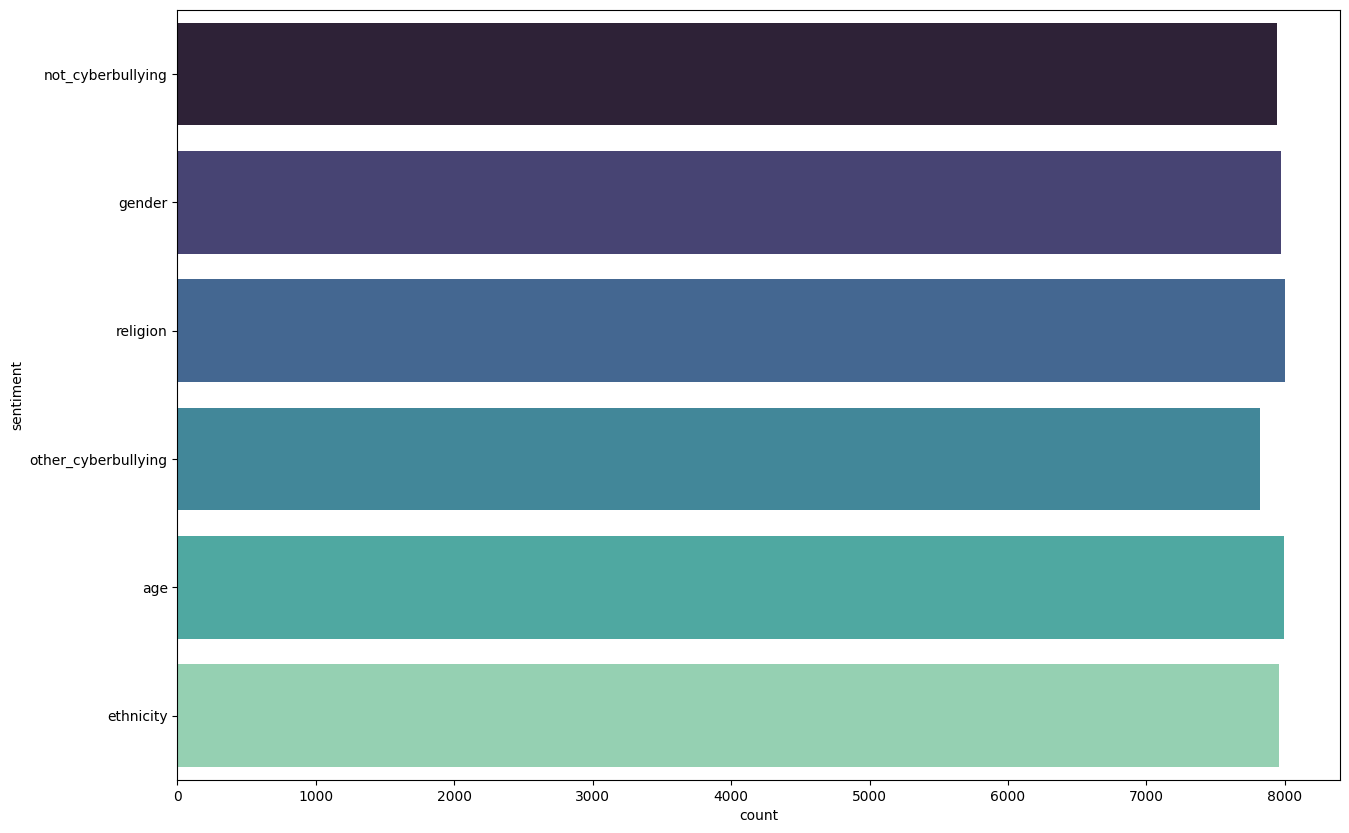

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(df['sentiment'],palette='mako')

## NLP PROCEDURE :
Cleaning of text,
Lemmatization,
TF-IDF

In [44]:
import re,string,nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import warnings 
warnings.filterwarnings(action='ignore')

In [45]:
# functton for cleaning the tweets

import re

def clean_tweet(df, field):
    # Remove URLs
    df[field] = df[field].str.replace(r"http\S+", " ", regex=True)
    df[field] = df[field].str.replace(r"http", " ", regex=True)
    
    # Replace "@" with "at"
    df[field] = df[field].str.replace(r"@", "at", regex=True)
    
    # Remove hashtags
    df[field] = df[field].str.replace(r"#\S+", " ", regex=True)
    
    # Remove special characters and numbers
    df[field] = df[field].str.replace(r"[^A-Za-z(),!?@\'\"_\n]", " ", regex=True)
    
    # Convert to lowercase
    df[field] = df[field].str.lower()
    
    # Remove extra spaces
    df[field] = df[field].str.replace(r"\s+", " ", regex=True).str.strip()
    
    return df



In [46]:
clean_tweet(df,"text")

,text,sentiment
0,in other words your food was crapilicious!,not_cyberbullying
1,why is so white?,not_cyberbullying
2,atxochitlsuckkks a classy whore? or more red v...,not_cyberbullying
3,"atjason_gio meh p thanks for the heads up, but...",not_cyberbullying
4,atrudhoeenglish this is an isis account preten...,not_cyberbullying
...,...,...
47687,"black ppl aren't expected to do anything, depe...",ethnicity
47688,turner did not withhold his disappointment tur...,ethnicity
47689,i swear to god this dumb nigger bitch i have g...,ethnicity
47690,yea fuck you rt attherealexel if youre a nigge...,ethnicity


In [47]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
%pip install emoji
import emoji

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [48]:
# applying lemmatizer to remove tenses from texts

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will'])
corpus = []

def preprocess_tweets(tweet):
    tweet = re.sub(r"won\'t", "will not", tweet)
    tweet = re.sub(r"can\'t", "can not", tweet)
    tweet = re.sub(r"n\'t", " not", tweet)
    tweet = re.sub(r"\'re", " are", tweet)
    tweet = re.sub(r"\'s", " is", tweet)
    tweet = re.sub(r"\'d", " would",tweet)
    tweet = re.sub(r"\'ll", " will", tweet)
    tweet = re.sub(r"\'t", " not", tweet)
    tweet = re.sub(r"\'ve", " have", tweet)
    tweet = re.sub(r"\'m", " am", tweet)
    tweet = re.sub('[^a-zA-Z]',' ',tweet)
    tweet = emoji.replace_emoji(tweet, replace='')
    tweet = re.sub(r"[^\x00-\x7f]","",tweet)
    tweet = " ".join([stemmer.stem(word) for word in tweet.split()])
    tweet = [lemmatizer.lemmatize(word) for word in tweet.split() if not word in set(STOPWORDS)]
    tweet = " ".join(tweet)
    return tweet

df["text_clean"] = df["text"].apply(preprocess_tweets)
    


In [49]:
df.head()

,text,sentiment,text_clean
0,in other words your food was crapilicious!,not_cyberbullying,word food crapilici
1,why is so white?,not_cyberbullying,whi white
2,atxochitlsuckkks a classy whore? or more red v...,not_cyberbullying,atxochitlsuckkk classi whore red velvet cupcak
3,"atjason_gio meh p thanks for the heads up, but...",not_cyberbullying,atjason gio meh thank head concern anoth angri...
4,atrudhoeenglish this is an isis account preten...,not_cyberbullying,atrudhoeenglish isi account pretend kurdish ac...


In [50]:
df['text_clean'].duplicated().sum()

2583

In [51]:
df.drop_duplicates("text_clean",inplace=True)
df.duplicated().sum()

0

In [52]:
#dropping the rows where other_bullying is present as it's irrelevant
df = df[df["sentiment"]!="other_cyberbullying"]

df['sentiment'].value_counts()

sentiment
religion             7942
age                  7863
ethnicity            7831
not_cyberbullying    7775
gender               7654
Name: count, dtype: int64

Text(0, 0.5, 'tweet length')

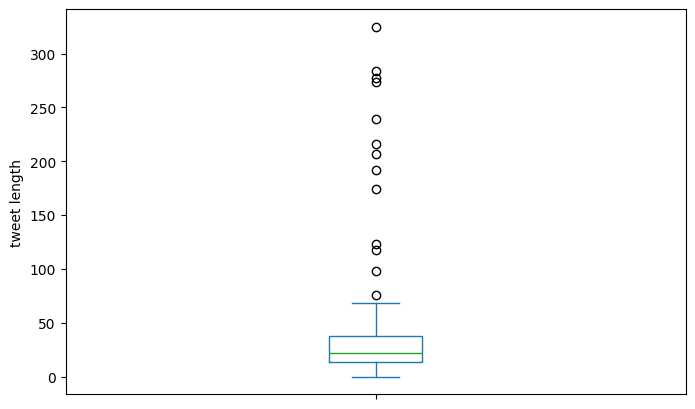

In [53]:
# calculating the tweet length

tweet_length = pd.Series([len(tweet.split()) for tweet in df['text']])
plt.figure(figsize=(8,5))
tweet_length.plot(kind="box")
plt.ylabel("tweet length")


<Axes: ylabel='Count'>

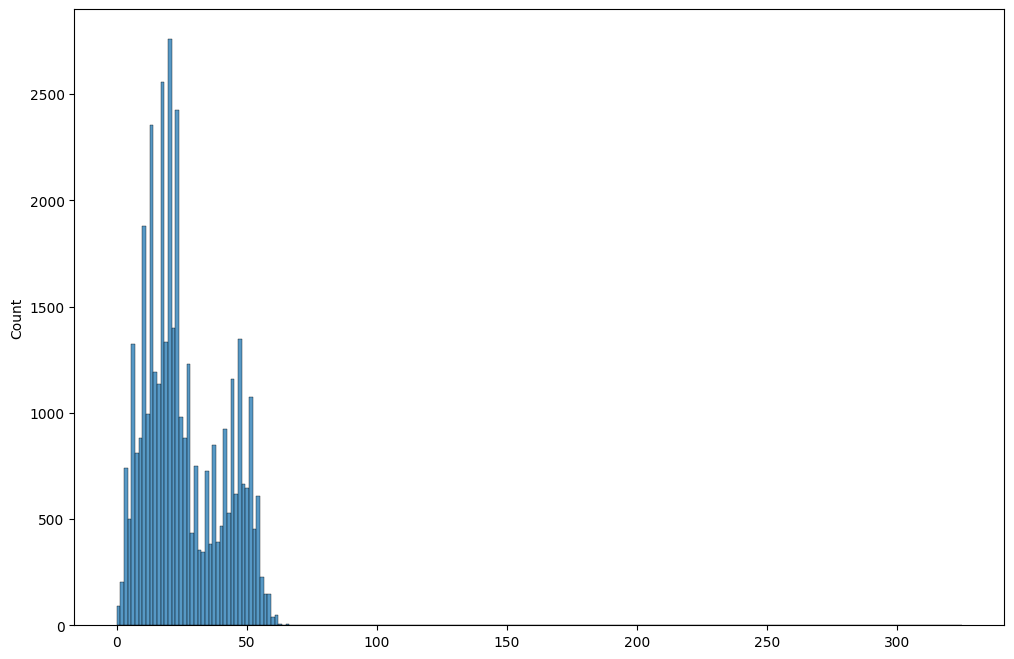

In [54]:
plt.figure(figsize=(12,8))
sns.histplot(tweet_length,palette="deep")

In [55]:
df["Length"] = df.text_clean.str.split().apply(len)

Descriptive statistics for Not_cyberbullying:


count    7775.000000
mean        7.688489
std         4.494136
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max       146.000000
Name: Length, dtype: float64

Descriptive statistics for Gender:


count    7654.000000
mean       13.201725
std         7.223039
min         1.000000
25%         8.000000
50%        12.000000
75%        16.000000
max       137.000000
Name: Length, dtype: float64

Descriptive statistics for Religion:


count    7942.000000
mean       18.080206
std         7.179862
min         1.000000
25%        12.000000
50%        19.000000
75%        24.000000
max        46.000000
Name: Length, dtype: float64

Descriptive statistics for Age:


count    7863.000000
mean       16.531858
std         7.292397
min         1.000000
25%        10.000000
50%        16.000000
75%        23.000000
max       138.000000
Name: Length, dtype: float64

Descriptive statistics for Ethnicity:


count    7831.000000
mean       14.583067
std         7.119341
min         2.000000
25%        10.000000
50%        13.000000
75%        18.000000
max       183.000000
Name: Length, dtype: float64

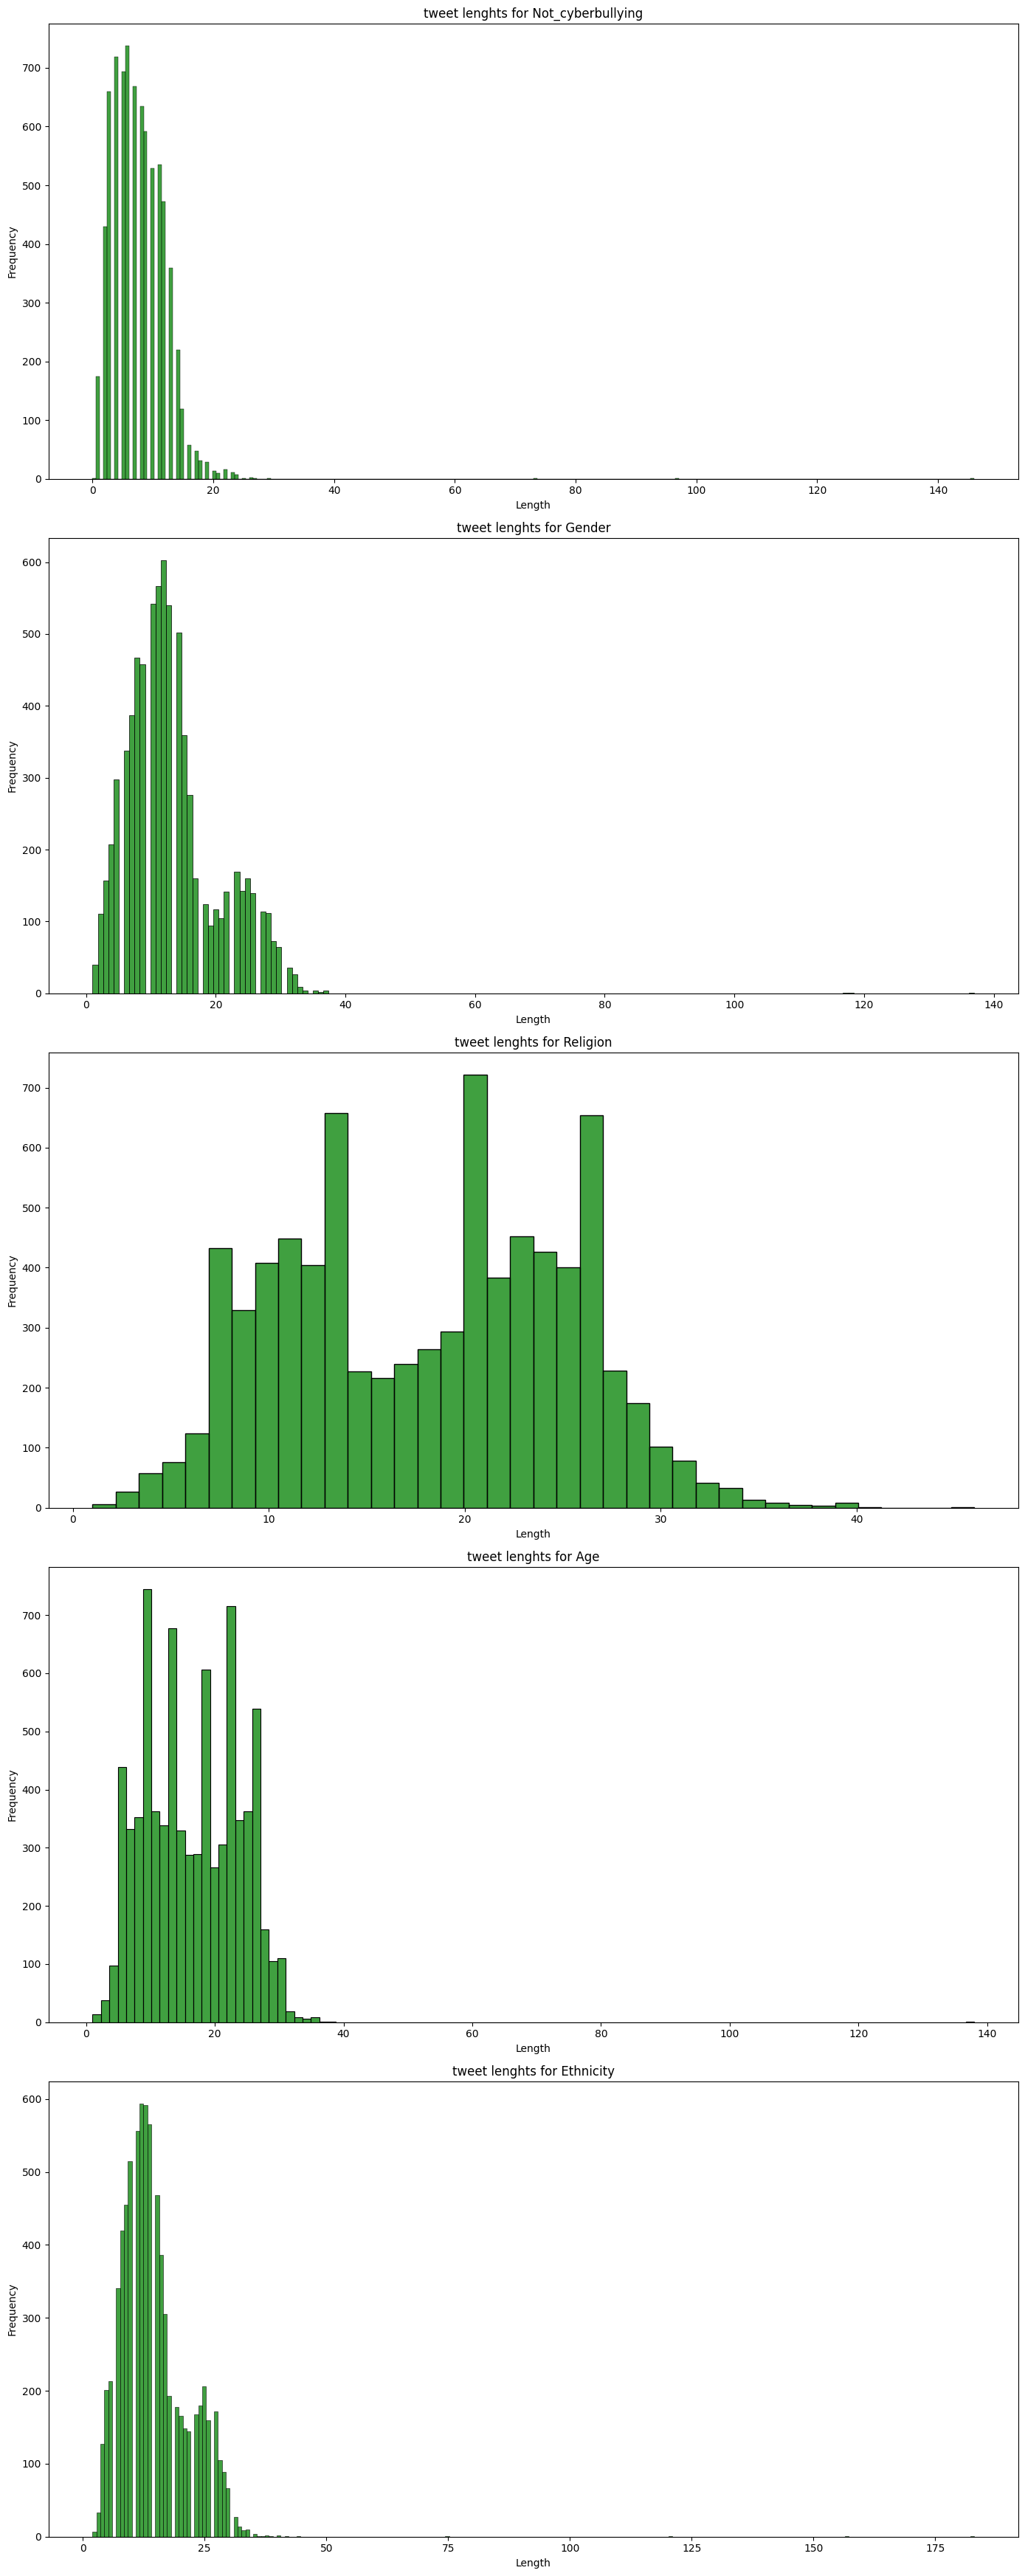

In [56]:
unique_sentiments = df["sentiment"].unique()

plt.figure(figsize=(14,7*len(unique_sentiments)))

for i,sentiment in enumerate(unique_sentiments):
  plt.subplot(len(unique_sentiments),1,i+1)
  sns.histplot(df[df["sentiment"]==sentiment]["Length"],color="g")
  plt.title(f"tweet lenghts for {sentiment.capitalize()}")
  plt.xlabel("Length")
  plt.ylabel("Frequency")
  plt.tight_layout()

  print(f"Descriptive statistics for {sentiment.capitalize()}:")
  display(df.Length[df["sentiment"] == sentiment].describe())
  
plt.show()  

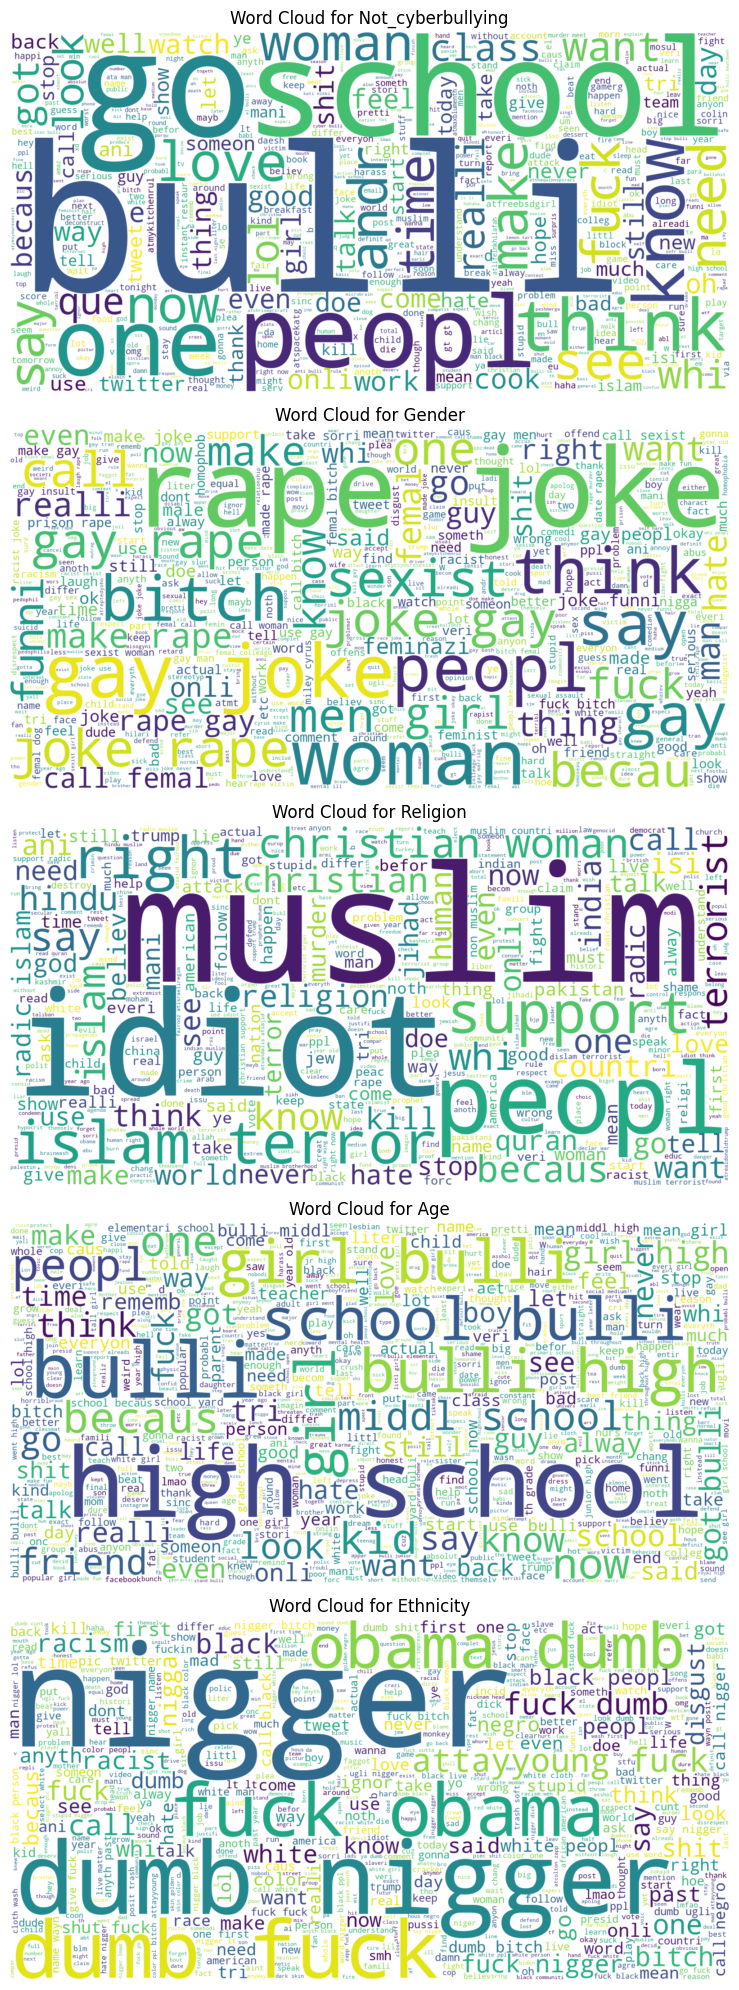

In [57]:
plt.figure(figsize=(20,20))

for i, sentiment in enumerate(unique_sentiments):
    plt.subplot(len(unique_sentiments), 1, i + 1)
    wc = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, 
                   background_color="white").generate(" ".join(df[df["sentiment"] == sentiment].text_clean))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment.capitalize()}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [58]:
df.head()

,text,sentiment,text_clean,Length
0,in other words your food was crapilicious!,not_cyberbullying,word food crapilici,3
1,why is so white?,not_cyberbullying,whi white,2
2,atxochitlsuckkks a classy whore? or more red v...,not_cyberbullying,atxochitlsuckkk classi whore red velvet cupcak,6
3,"atjason_gio meh p thanks for the heads up, but...",not_cyberbullying,atjason gio meh thank head concern anoth angri...,10
4,atrudhoeenglish this is an isis account preten...,not_cyberbullying,atrudhoeenglish isi account pretend kurdish ac...,8


In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sentiment_label"] = le.fit_transform(df["sentiment"])

In [60]:
df = df.drop(columns=["Length","text"])
df.head()

,sentiment,text_clean,sentiment_label
0,not_cyberbullying,word food crapilici,3
1,not_cyberbullying,whi white,3
2,not_cyberbullying,atxochitlsuckkk classi whore red velvet cupcak,3
3,not_cyberbullying,atjason gio meh thank head concern anoth angri...,3
4,not_cyberbullying,atrudhoeenglish isi account pretend kurdish ac...,3


## TRAINING THE MODEL

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [62]:
X=df["text_clean"]
y=df["sentiment_label"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
display(X_train.shape)
display(X_test.shape)

(29298,)

(9767,)

In [63]:
# TF-IDF

tfidf = TfidfVectorizer(use_idf=True,tokenizer=word_tokenize,min_df=0.00002,max_df=0.70)
X_train_tf = tfidf.fit_transform(X_train.astype('U'))
X_test_tf = tfidf.transform(X_test.astype('U'))

print(f"TF_IDF Model: Train features shape:{X_train_tf.shape} and Test features shape:{X_test_tf.shape}")

TF_IDF Model: Train features shape:(29298, 31305) and Test features shape:(9767, 31305)


In [68]:
#create a valuation function for all metrics

def evaluate_model(true,predicted):
  sc = accuracy_score(true,predicted)
  cr = classification_report(true,predicted)
  cm = confusion_matrix(true,predicted)
  #roc = roc_auc_score(true,predicted,multi_class='ovr')
  #ps = precision_score(true,predicted,average='weighted')

  return sc,cr,cm

In [65]:
models ={
  'RandomForestClassifier' : RandomForestClassifier(),
  'AdaBoostClassifier' : AdaBoostClassifier(),
  'GradientBoostingClassifier' : GradientBoostingClassifier(),
  'SVC' : SVC(),
  'DecisionTreeClassifier' : DecisionTreeClassifier(),
  'MultinomialNB' :MultinomialNB()
  
}

In [70]:
model_list = []
ac_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train_tf,y_train)  #train the model

  #making predictions
  y_train_pred = model.predict(X_train_tf)
  y_test_pred = model.predict(X_test_tf)

  #evaluate test and train dataset
  model_train_sc , model_train_cr, model_train_cm= evaluate_model(y_train, y_train_pred)
  model_test_sc , model_test_cr, model_test_cm= evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- accuracy score: {:.4f}".format(model_train_sc))
  print("- classification report: \n{}".format(model_train_cr))
  print("- confusion matrix: \n{}".format(model_train_cm))

  print('----------------------------------')

  print('Model performance for Training set')
  print("- accuracy score: {:.4f}".format(model_test_sc))
  print("- classification report: \n{}".format(model_test_cr))
  print("- confusion matrix: \n{}".format(model_test_cm))

  ac_list.append(model_test_sc)

  print('='*35)
  print('\n')

RandomForestClassifier
Model performance for Training set
- accuracy score: 0.9999
- classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5856
           1       1.00      1.00      1.00      5873
           2       1.00      1.00      1.00      5760
           3       1.00      1.00      1.00      5832
           4       1.00      1.00      1.00      5977

    accuracy                           1.00     29298
   macro avg       1.00      1.00      1.00     29298
weighted avg       1.00      1.00      1.00     29298

- confusion matrix: 
[[5856    0    0    0    0]
 [   0 5873    0    0    0]
 [   0    0 5758    2    0]
 [   0    0    0 5832    0]
 [   0    0    0    0 5977]]
----------------------------------
Model performance for Training set
- accuracy score: 0.9325
- classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2007
          

In [71]:
pd.DataFrame(list(zip(model_list,ac_list)),columns=['model-name','accuracy-score']).sort_values(by=["accuracy-score"],ascending=False)

,model-name,accuracy-score
0,RandomForestClassifier,0.932528
2,GradientBoostingClassifier,0.922494
3,SVC,0.918603
4,DecisionTreeClassifier,0.917682
1,AdaBoostClassifier,0.893826
5,MultinomialNB,0.815296


### achieved an  ACCURACY of 93.25 % through RANDOM FOREST CLASSIFICATION